In [3]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from itertools import product


## Example : itertools.product 
A = set([1,2,3])
B = set(['a','b','c'])
AxB = set(product(A,B))
AxB

RuntimeError: module compiled against API version 0xe but this version of numpy is 0xd

{(1, 'a'),
 (1, 'b'),
 (1, 'c'),
 (2, 'a'),
 (2, 'b'),
 (2, 'c'),
 (3, 'a'),
 (3, 'b'),
 (3, 'c')}

# 5.1 Convolutional Neural Networks

Let $\mathbf{x} \in \mathcal{X}\left(\Omega, \mathbb{R}\right)$ be a grayscale image on the grid domain $\Omega = [H] \times [W]$ with $\mathbb{u}=(u_1, u_2)$.

My python function `generate_grid` generates a `list` consisting of `tuple`s which indicate elements of grid $\Omega$ of size $h\times w$.

In general, image data is represented as a $h \times w$-matrix.
However, the author emphasizes that image is a function on grid.
Thus, we define an image data as an one-to-one correspondence between grid and real-value.
The `dictionary` type data is suitable to represent any one-to-one correspondence.
Thus, I define an image as a `dictionary` whose `keys` are `tuple`s in grid `list` and `values` are grayscales.

In [ ]:
# Generate grid
def generate_grid(h,w):
    H = range(h)
    W = range(w)
    Omega = list(product(H,W))
    return Omega

def example_image(Grid):
    image = {}
    for u in Grid:
        u1, u2 = u
        image[u] = u1%3 + u2%3
    return image


# This function transforms our dictionary type image to typical numpy array type image.
def image_visualization(image_X):
    Omega = list(image_X.keys())
    values = image_X.values()
    h,w = Omega[-1]
    visualize_image = np.zeros((h+1,w+1))
    for u,x in zip(Omega,values):
        visualize_image[u] = x
    return visualize_image

In [4]:
# Example

Omega = generate_grid(4,4)
image = example_image(Omega)
print(image)

{(0, 0): 0, (0, 1): 1, (0, 2): 2, (0, 3): 0, (1, 0): 1, (1, 1): 2, (1, 2): 3, (1, 3): 1, (2, 0): 2, (2, 1): 3, (2, 2): 4, (2, 3): 2, (3, 0): 0, (3, 1): 1, (3, 2): 2, (3, 3): 0}


In [5]:
numpy_image = image_visualization(image)
print(numpy_image)

[[0. 1. 2. 0.]
 [1. 2. 3. 1.]
 [2. 3. 4. 2.]
 [0. 1. 2. 0.]]


(0.0, 4.0, 4.0, 0.0)

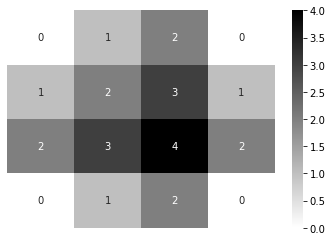

In [6]:
sns.heatmap(numpy_image, annot=True, cmap = 'binary')
plt.axis('off')

In [7]:
## Figure 14 in p.69.

def fig14_img(Grid):
    image = {}


    for u in Grid:
        u1, u2 = u
        if (u1 < 3) & (u1 < u2) & (u2 < u1 + 4):
            value = 1
        elif (u1 >= 3) & ((u1 + u2 ==6) or (u1 + u2 ==7)):
            value = 1
        else :
            value = 0
            
        image[u] = value
    return image

(0.0, 7.0, 7.0, 0.0)

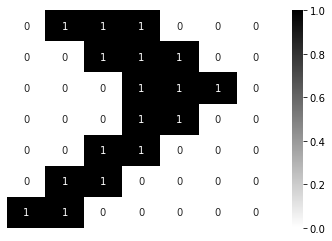

In [8]:
Omega = generate_grid(7,7)
fig14 = fig14_img(Omega)
img_fig14= image_visualization(fig14)
sns.heatmap(img_fig14, annot = True, cmap = 'binary')
plt.axis('off')


Any convolution with a complactly supported filter of size $H^f \times W^f$ can be written as a *linear combination of generators* $\theta_{1,1}, \ldots, \theta_{H^f,W^f}$, given for example by the unit peaks $\theta_{vw}(u_1, u_2) = \delta(u_1 - v, u_2 -w)$.
Here, $\delta$ is a *discrete Direc delta function*, that is, 
$$ \delta(u_1, u_2) = \begin{cases} 1 & \text{ if $(u_1, u_2) = (0,0)$}\\ 0 & \text{ o/w }\end{cases}.$$

For image $\mathbf{x}$ and filter $\theta$, the convolution $(\mathbf{x}\star \theta)$ is defined as $$(\mathbf{x} \star \theta)(u_1,u_2) = \sum_{(a,b) \in \Omega} x{(a,b)}\theta{(a-u_1,b-u_2)}$$ where $(u_1,u_2)$ is in the compactly support of $\theta$.

Note that the operator $\theta_{vw}$ makes the image $\mathbf{x}$ translated along $v,w$ direction.  

In [9]:
def unit_peak_filters(H_f,W_f,image):
    Grid = list(image.keys())
    x_values = list(image.values())

    h, w = Grid[-1]
    h += 1
    w += 1

    # here theta_vw is the unit peak function.
    def theta_vw(v,w,u):
        u1, u2 = u
        if (u1-v == 0) & (u2-w == 0):
            value = 1
        else :
            value = 0 
        return value


    generators = []

    # We consider the image of thetas on only its compact support. 
    cpt_supp = generate_grid(h-H_f+1, w-W_f+1)

    # choose a generator.
    for v in range(H_f):
        for w in range(W_f):
            # compute the convolution of image and the filter.
            convolution = {}
            for u in cpt_supp:
                u = np.array(u)
                theta_values = np.array([theta_vw(v,w,np.array(g)-u) for g in Grid])
                u = tuple(u)
                convolution[u] = np.inner(theta_values, x_values)
            generators.append(convolution)
    return generators

In [11]:
thetas = unit_peak_filters(3,3,fig14)
# Here, thetas contains 9 generators theta_(1,1), ... , theta_(3,3).
len(thetas)

9

In [14]:
theta11 = image_visualization(thetas[0])
theta12 = image_visualization(thetas[1])

In [19]:
theta13 = image_visualization(thetas[2])
theta22 = image_visualization(thetas[4])
theta31 = image_visualization(thetas[6])
theta33 = image_visualization(thetas[8])

<AxesSubplot:>

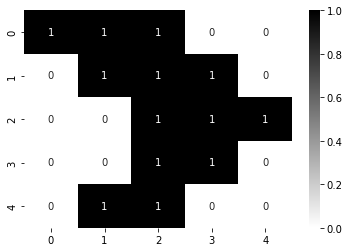

In [29]:
sns.heatmap(theta12, annot = True, cmap = 'binary')

<AxesSubplot:>

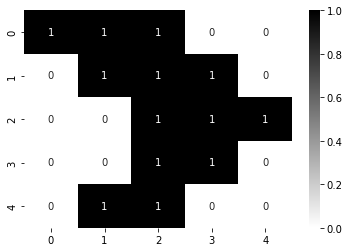

In [17]:
sns.heatmap(theta12, annot = True, cmap = 'binary')

The convolution map $C(\theta)\mathbf{x}$ is defined as $\mathbf{x}\star\theta$.
And any local linear equivariant map is expressible as the linear combination of generators $\theta_{1,1}, \ldots, \theta_{H^f, W^f}$ :
$$ \mathbf{F}(\mathbf{x}) = \sum_{v=1}^{H^f}\sum_{w=1}^{W^f}\alpha_{vw}C(\theta_{vw})\mathbf{x}.$$

If your filter can be expressed as a matrix $\begin{bmatrix}1 & 0 & 1\\ 0 & 1 & 0 \\ 1 & 0 & 1\end{bmatrix} $, then  choose the coefficients $$\alpha_{1,1} = 1, \alpha_{1,2} = 0 , \alpha_{1,3} = 1, \alpha_{2,1} = 0, \alpha_{2,2} = 1, \alpha_{2,3} = 0, \alpha_{3,1} = 1, \alpha_{3,2} = 0, \alpha_{3,3} = 1.$$

In [22]:
alphas = np.array([1,0,1,0,1,0,1,0,1])
numpy_images = np.array([image_visualization(theta) for theta in thetas])

Fx = np.sum([alphas[i]*numpy_images[i] for i in range(9)], axis = 0)
Fx

array([[1., 4., 3., 4., 1.],
       [1., 2., 4., 3., 3.],
       [1., 2., 3., 4., 1.],
       [1., 3., 3., 1., 1.],
       [3., 3., 1., 1., 0.]])

(0.0, 5.0, 5.0, 0.0)

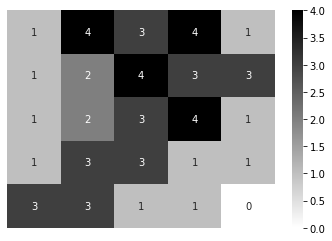

In [23]:
sns.heatmap(Fx, annot = True, cmap = 'binary')
plt.axis('off')

Other choices of the basis $\theta_{vw}$ are also possible and will yield equivalent operations (for potentially different choices of $\alpha_{vw}$).

A popular example are *directional derivatives* $\theta_{vw}(u_1,u_2) = \delta(u_1,u_2) - \delta(u_1 - v, u_2 -w), (v,w) \neq (0,0)$ taken together with the local average $\theta_0 (u_1, u_2) = \frac{1}{H_f W_f}$.

In [24]:
def directional_derivatives(H_f,W_f,image):
    Grid = list(image.keys())
    x_values = list(image.values())

    h, w = Grid[-1]
    h += 1
    w += 1

    

    def theta_vw(v,w,u):
        if (v,w) == (0,0) :
            value = 1/(H_f*W_f)
        else:
            u1, u2 = u

            if (u1 == 0) & (u2 == 0):
                delta1 = 1
            else :
                delta1 = 0

            if (u1-v == 0) & (u2-w == 0):
                delta2 = 1
            else :
                delta2 = 0
            
            value = delta1 - delta2 
        return value


    generators = []
    cpt_supp = generate_grid(h-H_f+1, w-W_f+1)

    # choose a generator.
    for v in range(H_f):
        for w in range(W_f):
            # compute the convolution of image and the filter.
            
            output = {}
            for u in cpt_supp:
                u = np.array(u)
                theta_values = np.array([theta_vw(v,w,np.array(g)-u) for g in Grid])
                u = tuple(u)
                output[u] = np.inner(theta_values, x_values)
            generators.append(output)
    return generators

In [25]:
thetas = directional_derivatives(3,3,fig14)

In [26]:
image_visualization(thetas[0])

array([[1.88888889, 1.88888889, 1.88888889, 1.88888889, 1.88888889],
       [1.88888889, 1.88888889, 1.88888889, 1.88888889, 1.88888889],
       [1.88888889, 1.88888889, 1.88888889, 1.88888889, 1.88888889],
       [1.88888889, 1.88888889, 1.88888889, 1.88888889, 1.88888889],
       [1.88888889, 1.88888889, 1.88888889, 1.88888889, 1.88888889]])

<AxesSubplot:>

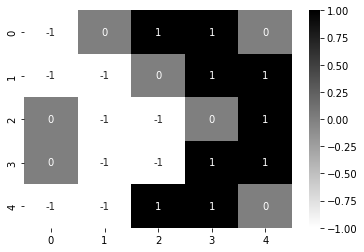

In [27]:
sns.heatmap(image_visualization(thetas[2]), annot = True, cmap = 'binary')